In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [2]:
test=pd.read_csv("../input/digit-recognizer/test.csv")
train=pd.read_csv("../input/digit-recognizer/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=train.iloc[:,1:] #returns dataframe
y=train.iloc[:,0] #returns series

In [5]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.pixel256.max()

255

In [6]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [14]:
v=np.array(X).reshape(-1, 28, 28, 1)/255

In [15]:
import matplotlib.pyplot as plt

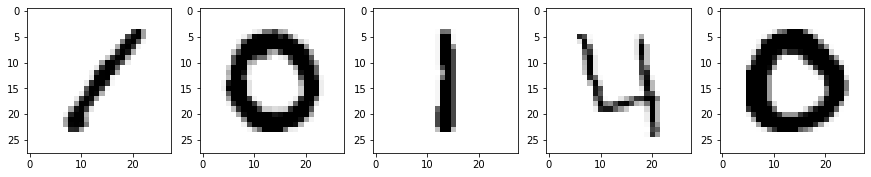

In [16]:

fig, ax = plt.subplots(1, 5, figsize=(15,8))
for i in range(5):
    ax[i].imshow(v[i], cmap='binary')

In [17]:
t=np.array(test).reshape(-1, 28, 28, 1)/250

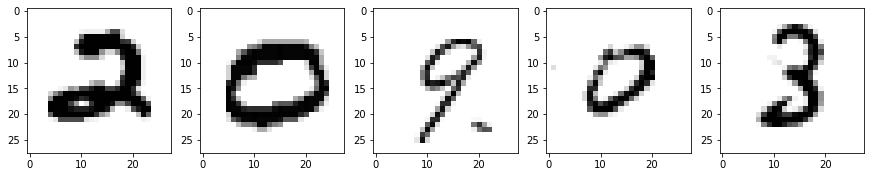

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(15,8))
for i in range(5):
    ax[i].imshow(t[i], cmap='binary')

In [19]:
X=np.array(X)/255.0
X = X.reshape((-1, 784))
X.shape

(42000, 784)

In [20]:
test=np.array(test)/255.0
test=test.reshape(-1,784)
test.shape

(28000, 784)

In [21]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [22]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Digit_recognizer')

In [23]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [24]:
num_classes=10

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [29]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [30]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 39s]
val_accuracy: 0.9557936390240988

Best val_accuracy So Far: 0.9676190217336019
Total elapsed time: 00h 03m 23s


In [31]:
tuner.results_summary()

Results summary
Results in project/Digit_recognizer
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 256
units_1: 224
learning_rate: 0.001
units_2: 32
units_3: 128
Score: 0.9676190217336019
Trial summary
Hyperparameters:
num_layers: 3
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
Score: 0.9646560748418173
Trial summary
Hyperparameters:
num_layers: 2
units_0: 256
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 224
Score: 0.9557936390240988
Trial summary
Hyperparameters:
num_layers: 4
units_0: 224
units_1: 128
learning_rate: 0.0001
units_2: 128
units_3: 32
Score: 0.9547354578971863
Trial summary
Hyperparameters:
num_layers: 3
units_0: 160
units_1: 224
learning_rate: 0.0001
units_2: 32
Score: 0.9524867733319601


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU

In [34]:
classifier= Sequential()

In [35]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 256,activation='relu',input_dim = 784))

# Adding the second hidden layer
classifier.add(Dense(units = 224,activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 32,activation='relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units = 128,activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 10, activation = 'softmax'))

In [36]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
y_cat = keras.utils.to_categorical(y, num_classes)

In [38]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X,y_cat, batch_size = 32,epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5939 - accuracy: 0.8309
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1667 - accuracy: 0.9501
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1100 - accuracy: 0.9661
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0807 - accuracy: 0.9766
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0637 - accuracy: 0.9813
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0471 - accuracy: 0.9852
Epoch 7/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0369 - accuracy: 0.9891
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0287 - accuracy: 0.9916
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.017

In [46]:
pred = np.argmax(classifier.predict(test),axis=-1)
pred

array([2, 0, 9, ..., 3, 9, 2])

In [47]:
df = pd.DataFrame(pred)
df['ImageId'] = df.index + 1
df.rename(columns={0: 'Label'}, inplace=True)
df = df[['ImageId', 'Label']]

In [48]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [49]:
df.to_csv("output.csv",index=False)